In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
from skimage import io, color, filters, exposure

def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

def load_images_and_compute_histograms(class_paths):
    images = []
    histograms = []
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)
                hist = compute_edge_histogram(image)

                images.append(image)
                histograms.append(hist)
                labels.append(class_label)

    return np.array(images), np.array(histograms), np.array(labels)

class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

images, histograms, labels = load_images_and_compute_histograms(class_paths)


In [ ]:
print("Number of images:", len(images))
print("Number of histograms:", len(histograms))
print("Number of labels:", len(labels))

# Display information for the first image
print("First image shape:", images[769].shape)
print("First histogram:", histograms[769])
print("Label for the first image:", labels[769])
print(len(histograms))

Number of images: 1542
Number of histograms: 1542
Number of labels: 1542
First image shape: (128, 128, 3)
First histogram: [3438 2742 1588 1172 1047  984  841  743  631  542  440  401  348  265
  230  191  160  128  106   82   73   51   38   31   24   15   21   11
    8    7    7    9    5    2    2    1]
Label for the first image: n02092002-Scottish_deerhound
1542


In [ ]:
import os
import numpy as np
from skimage import io, color, filters, exposure

# Function to compute the edge histogram of an image
def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

# Function to load images from given class paths and compute histograms
def load_images_and_compute_histograms(class_paths):
    images = []
    histograms = []
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)

                # Compute the edge histogram for the current image
                hist = compute_edge_histogram(image)

                images.append(image)
                histograms.append(hist)
                labels.append(class_label)

    # Convert lists to numpy arrays for ease of use
    return np.array(images), np.array(histograms), np.array(labels)

# List of paths for four different classes
class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

# Load images and compute histograms
images, edge_histograms, labels = load_images_and_compute_histograms(class_paths)


In [ ]:
import numpy as np

# Assuming 'histograms' is your array of histograms
# Each histogram can be represented as a 1D NumPy array

def standardize_histograms(histograms):
    standardized_histograms = []

    for histogram in histograms:
        mean = np.mean(histogram)
        std = np.std(histogram)

        # Standardize the histogram
        standardized_histogram = (histogram - mean) / std
        standardized_histograms.append(standardized_histogram)

    return standardized_histograms


standardized_histograms = standardize_histograms(histograms)


In [ ]:
print(standardized_histograms)
print(len(standardized_histograms))

[array([ 4.9596141 ,  2.48880191,  1.28224636,  0.65270167,  0.19884388,
       -0.05349073, -0.17836621, -0.19989647, -0.23778972, -0.26620965,
       -0.27912781, -0.28515628, -0.3118538 , -0.31529864, -0.30840896,
       -0.3118538 , -0.31443743, -0.32477195, -0.30065806, -0.32391074,
       -0.31960469, -0.32993921, -0.31960469, -0.33338405, -0.33252284,
       -0.33080042, -0.32563316, -0.33424526, -0.35146947, -0.34285737,
       -0.36438762, -0.36008157, -0.36697125, -0.38161183, -0.3876403 ,
       -0.39022393]), array([ 2.1543259 ,  3.15311772,  2.27049957,  1.9295223 ,  1.44068763,
        1.08764037,  0.79946932,  0.47508829,  0.40417709,  0.15674225,
       -0.02129012, -0.14953379, -0.22949748, -0.32002242, -0.37735488,
       -0.42865235, -0.44977483, -0.49352855, -0.4980548 , -0.54180852,
       -0.56443976, -0.5719835 , -0.60970222, -0.62026347, -0.61121097,
       -0.63384221, -0.65043845, -0.66099969, -0.66552594, -0.67005218,
       -0.68363092, -0.67910468, -0.68212

In [ ]:
print("Number of images:", len(images))
print("Number of histograms:", len(histograms))
print("Number of labels:", len(labels))

# Display information for the first image
print("First image shape:", images[769].shape)
print("First histogram:", histograms[769])
print("Label for the first image:", labels[769])
print(len(histograms))


# Print all edge histograms
for i, histogram in enumerate(edge_histograms):
    print(f"Edge Histogram for image {i + 1}:\n{histogram}\n")

Streaming output truncated to the last 5000 lines.
Edge Histogram for image 543:
[2356 3288 2359 1720 1268 1028  834  647  507  427  352  255  240  209
  162  142  117  100   80   63   61   45   25   29   16   14   12   10
    4    4    2    3    1    1    0    3]

Edge Histogram for image 544:
[3542 4586 2695 1474  919  631  526  383  252  222  180  190  149  117
   93   77   76   63   46   34   29   21   15   12    6    5    9    8
    5    4    1    1    5    3    3    2]

Edge Histogram for image 545:
[2598 3297 2383 1596 1151  789  652  495  436  382  267  227  212  204
  160  149  143  100  119  100  102   99  112  102   93   83   87   73
   53   48   37   20    6    8    0    1]

Edge Histogram for image 546:
[4217 4209 2184 1228  811  653  509  367  298  256  183  165  133  135
  109   94   96   68   72   76   83   69   57   59   48   54   31   36
   18   19   10   10    7    8    4    8]

Edge Histogram for image 547:
[1977 3394 2688 1940 1407 1080  769  687  482  373  304  27

In [ ]:
# Converted the Resized images to edge histograms and stored in edge_histograms variable.
# Checked hist vectors for random images.
# checked the length of edge_histograms.
# Also standardized the edge histograms and stored them in standardized_edge_histogram variable.
import os
import numpy as np
from skimage import io, color, filters, exposure

# Function to compute the edge histogram of an image
def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

# Function to load images from given class paths and compute histograms
def load_images_and_compute_histograms(class_paths):
    images = []
    edge_histograms = []  # Corrected variable name
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)

                # Compute the edge histogram for the current image
                hist = compute_edge_histogram(image)

                images.append(image)
                edge_histograms.append(hist)  # Corrected variable name
                labels.append(class_label)

    # Convert lists to numpy arrays for ease of use
    return np.array(images), np.array(edge_histograms), np.array(labels)

# List of paths for four different classes
class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

# Load images and compute histograms
images, edge_histograms, labels = load_images_and_compute_histograms(class_paths)

# Display information for the first image
print("Number of images:", len(images))
print("Number of edge histograms:", len(edge_histograms))
print("Number of labels:", len(labels))

# Display information for the first image
print("First image shape:", images[0].shape)
print("First edge histogram:", edge_histograms[0])
print("Label for the first image:", labels[0])
print(len(edge_histograms))


# Print all edge histograms
for i, histogram in enumerate(edge_histograms):
    print(f"Edge Histogram for image {i + 1}:\n{histogram}\n")

###########################################################################
import numpy as np

# Assuming 'edge_histograms' is your array of edge histograms
# Each histogram can be represented as a 1D NumPy array

def standardize_histograms(histograms):
    standardized_histograms = []

    for histogram in histograms:
        mean = np.mean(histogram)
        std = np.std(histogram)

        # Standardize the histogram
        standardized_histogram = (histogram - mean) / std
        standardized_histograms.append(standardized_histogram)

    return standardized_histograms

standardized_edge_histograms = standardize_histograms(edge_histograms)  # Corrected variable name

print(standardized_edge_histograms)
print(len(standardized_edge_histograms))
##########################################################################


Streaming output truncated to the last 5000 lines.
       -5.03292524e-01, -5.09428575e-01, -5.29063938e-01, -5.27836728e-01,
       -5.24155097e-01, -5.27836728e-01, -5.26609518e-01, -5.46244880e-01,
       -5.45017670e-01, -5.41336040e-01, -5.46244880e-01, -5.52380931e-01,
       -5.54835351e-01, -5.54835351e-01, -5.57289772e-01, -5.57289772e-01]), array([ 1.7048497 ,  2.97271063,  2.61146866,  2.01127285,  1.64300283,
        1.18758493,  0.87553934,  0.60847329,  0.27956037,  0.11229268,
       -0.07184233, -0.24613807, -0.33047471, -0.3684262 , -0.43027308,
       -0.47103579, -0.49914801, -0.53428828, -0.55958927, -0.58629588,
       -0.56240049, -0.57223977, -0.61440809, -0.61019126, -0.61300248,
       -0.61440809, -0.61862492, -0.62284176, -0.62565298, -0.63549225,
       -0.6284642 , -0.63830347, -0.63830347, -0.63830347, -0.63970909,
       -0.63689786]), array([ 4.04601439,  2.94514899,  1.65001323,  1.17821378,  0.8359279 ,
        0.60118454,  0.42194701,  0.20686196, -0.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have standardized_edge_histograms, labels, and other relevant variables

# Get unique class labels
unique_classes = set(labels)

# Initialize empty lists to store training and test sets
x_train, x_test, y_train, y_test = [], [], [], []

# Perform 80/20 split for each class
for class_label in unique_classes:
    class_indices = [i for i, label in enumerate(labels) if label == class_label]
    class_histograms = [standardized_edge_histograms[i] for i in class_indices]
    class_labels = [labels[i] for i in class_indices]

    # Perform the split
    class_x_train, class_x_test, class_y_train, class_y_test = train_test_split(
        class_histograms, class_labels, test_size=0.2, random_state=42
    )

    # Append to the overall training and test sets
    x_train.extend(class_x_train)
    x_test.extend(class_x_test)
    y_train.extend(class_y_train)
    y_test.extend(class_y_test)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (1232, 36)
Test set shape: (310, 36)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train is your training dataset

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_standardized = scaler.fit_transform(x_train)

# The resulting x_train_standardized contains the standardized features
# Assuming x_test is your test dataset

# Transform the test data using the scaler fitted on the training data
x_test_standardized = scaler.transform(x_test)


In [ ]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (1232, 36)
Test set shape: (310, 36)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have x_train and x_test defined

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

# Now x_train_standardized and x_test_standardized contain the standardized features


In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have x_train_standardized and y_train defined

# Set the values of k
k_values = [1, 3, 5, 7, 10, 20]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training data
x_train_standardized = scaler.fit_transform(x_train)

# Perform standard 5-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_standardized, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    print(f"Standard Cross-Validation - k={k}: {scores.mean()}")

# Perform stratified 5-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_standardized, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    print(f"Stratified Cross-Validation - k={k}: {scores.mean()}")


Standard Cross-Validation - k=1: 0.5422204667390804
Standard Cross-Validation - k=3: 0.45456041604950465
Standard Cross-Validation - k=5: 0.4383331687567888
Standard Cross-Validation - k=7: 0.4439913103584477
Standard Cross-Validation - k=10: 0.4504953753990981
Standard Cross-Validation - k=20: 0.4326059050064185
Stratified Cross-Validation - k=1: 0.5551890984496889
Stratified Cross-Validation - k=3: 0.46752246469833125
Stratified Cross-Validation - k=5: 0.4521411408446069
Stratified Cross-Validation - k=7: 0.43914946841776115
Stratified Cross-Validation - k=10: 0.45296731509825217
Stratified Cross-Validation - k=20: 0.4285836542575952


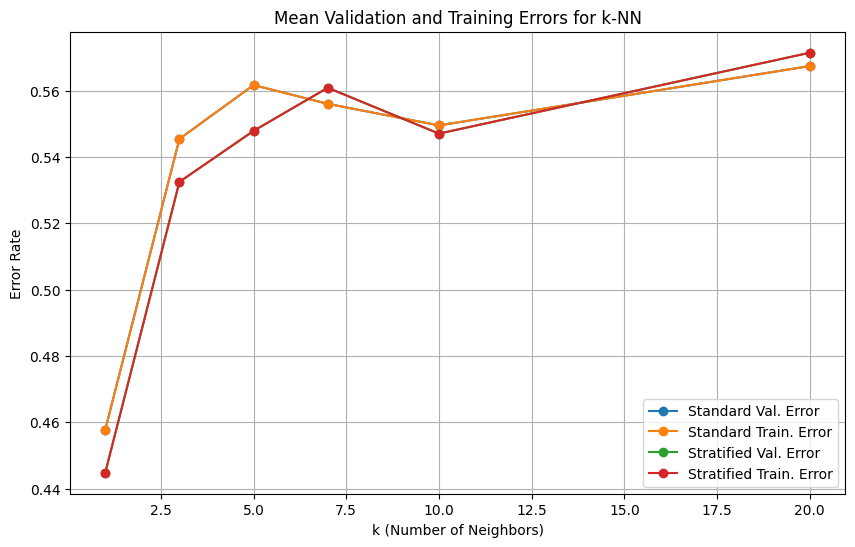

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have x_train_standardized and y_train defined

# Set the values of k
k_values = [1, 3, 5, 7, 10, 20]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training data
x_train_standardized = scaler.fit_transform(x_train)

# Initialize lists to store mean validation and training errors
mean_val_errors_standard = []
mean_train_errors_standard = []
mean_val_errors_stratified = []
mean_train_errors_stratified = []

# Perform standard 5-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    val_scores = cross_val_score(knn, x_train_standardized, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    train_scores = cross_val_score(knn, x_train_standardized, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    mean_val_errors_standard.append(1 - val_scores.mean())
    mean_train_errors_standard.append(1 - train_scores.mean())

# Perform stratified 5-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    val_scores = cross_val_score(knn, x_train_standardized, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    train_scores = cross_val_score(knn, x_train_standardized, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    mean_val_errors_stratified.append(1 - val_scores.mean())
    mean_train_errors_stratified.append(1 - train_scores.mean())

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_val_errors_standard, marker='o', label='Standard Val. Error')
plt.plot(k_values, mean_train_errors_standard, marker='o', label='Standard Train. Error')
plt.plot(k_values, mean_val_errors_stratified, marker='o', label='Stratified Val. Error')
plt.plot(k_values, mean_train_errors_stratified, marker='o', label='Stratified Train. Error')

# Adding labels and legend
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Mean Validation and Training Errors for k-NN')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have x_train_standardized, y_train, x_test_standardized, and y_test defined

# Set the values of k
k_values = [1, 3, 5, 7, 10, 20]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and test data
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

# Initialize lists to store mean validation errors
mean_val_errors = []

# Perform stratified 5-fold cross-validation to find the best k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    val_scores = cross_val_score(knn, x_train_standardized, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    mean_val_errors.append(1 - val_scores.mean())

# Get the index of the k value with the lowest mean validation error
best_k_idx = np.argmin(mean_val_errors)
best_k = k_values[best_k_idx]

# Create the k-Nearest Neighbor classifier with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the entire training set
knn_best.fit(x_train_standardized, y_train)

# Make predictions on the test set
y_pred_test = knn_best.predict(x_test_standardized)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Best k: {best_k}")
print(f"Accuracy on test set with best k: {test_accuracy}")


Best k: 1
Accuracy on test set with best k: 0.5903225806451613


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
# Initialize the classifiers with chosen parameters
neural_net = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

classifiers = {
    "Neural Network": neural_net,
    "Decision Tree": decision_tree,
    "AdaBoost": adaboost
}


Training and evaluating Neural Network classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

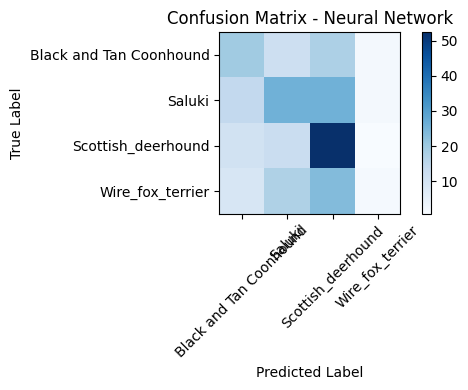

Training and evaluating Decision Tree classifier...


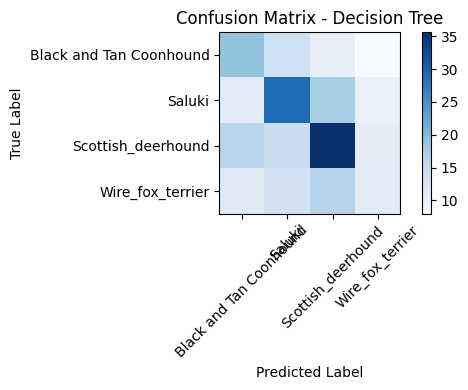

Training and evaluating AdaBoost classifier...


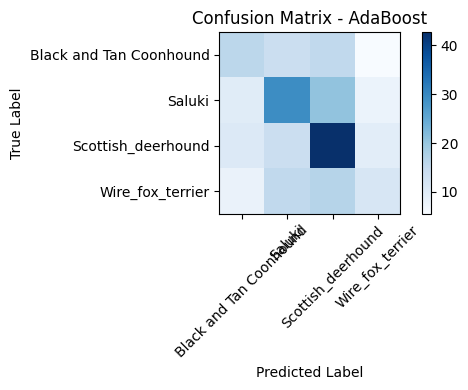

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Initialize the confusion matrices list
conf_matrices = []

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    print(f"Training and evaluating {name} classifier...")

    # Initialize the total confusion matrix
    total_conf_matrix = np.zeros((4, 4))

    for train_index, val_index in skf.split(x_train, y_train):
        X_train, X_val = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Fit the classifier on the training fold
        clf.fit(X_train, y_train_fold)

        # Predict on the validation fold
        y_pred = clf.predict(X_val)

        # Compute confusion matrix for this fold
        conf_matrix_fold = confusion_matrix(y_val_fold, y_pred)

        # Add to total confusion matrix
        total_conf_matrix += conf_matrix_fold

    # Calculate average confusion matrix over folds
    avg_conf_matrix = total_conf_matrix / 5

    # Add to list of confusion matrices
    conf_matrices.append((name, avg_conf_matrix))

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(avg_conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, ["Black and Tan Coonhound", "Saluki", "Scottish_deerhound", "Wire_fox_terrier"], rotation=45)
    plt.yticks(tick_marks, ["Black and Tan Coonhound", "Saluki", "Scottish_deerhound", "Wire_fox_terrier"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Training and evaluating Neural Network classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

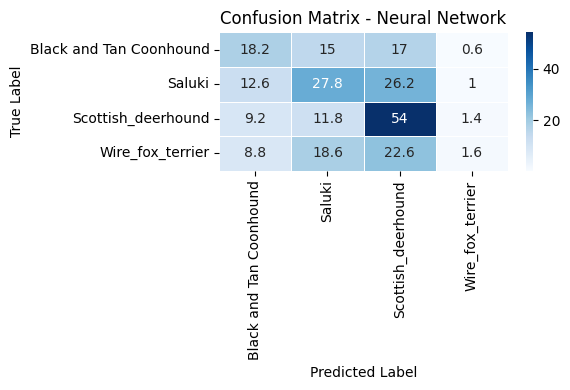

Training and evaluating Decision Tree classifier...


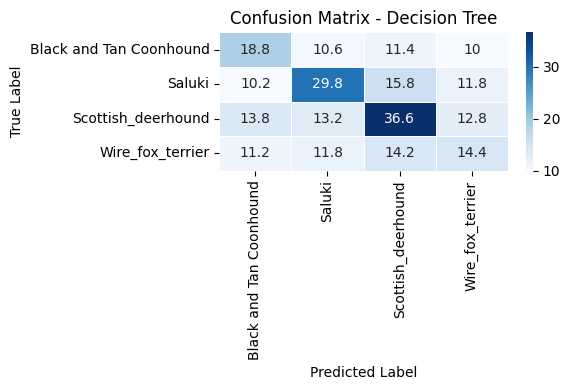

Training and evaluating AdaBoost classifier...


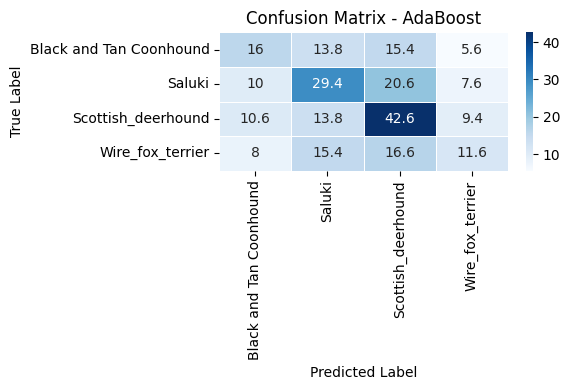

Length of Neural Network Predictions: 0
Length of Decision Tree Predictions: 0
Length of AdaBoost Predictions: 0


In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the confusion matrices list
conf_matrices = []

# Initialize empty lists to store predictions for each classifier
neural_network_predictions = []
decision_tree_predictions = []
adaboost_predictions = []

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for classifier, name in zip(classifiers, classifier_names):
    print(f"Training and evaluating {name} classifier...")

    # Initialize the total confusion matrix
    total_conf_matrix = np.zeros((4, 4))

    for train_index, val_index in skf.split(x_train, y_train):
        X_train, X_val = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Fit the classifier on the training fold
        classifier.fit(X_train, y_train_fold)

        # Predict on the validation fold
        y_pred = classifier.predict(X_val)

        # Compute confusion matrix for this fold
        conf_matrix_fold = confusion_matrix(y_val_fold, y_pred)

        # Add to total confusion matrix
        total_conf_matrix += conf_matrix_fold

    # Calculate average confusion matrix over folds
    avg_conf_matrix = total_conf_matrix / 5

    # Add to list of confusion matrices
    conf_matrices.append((name, avg_conf_matrix))

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_conf_matrix, annot=True, fmt="g", cmap='Blues', linewidths=0.5,
                xticklabels=["Black and Tan Coonhound", "Saluki", "Scottish_deerhound", "Wire_fox_terrier"],
                yticklabels=["Black and Tan Coonhound", "Saluki", "Scottish_deerhound", "Wire_fox_terrier"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Check the length of predictions to ensure it matches the test set size
print("Length of Neural Network Predictions:", len(neural_network_predictions))
print("Length of Decision Tree Predictions:", len(decision_tree_predictions))
print("Length of AdaBoost Predictions:", len(adaboost_predictions))


Training and evaluating Neural Network classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

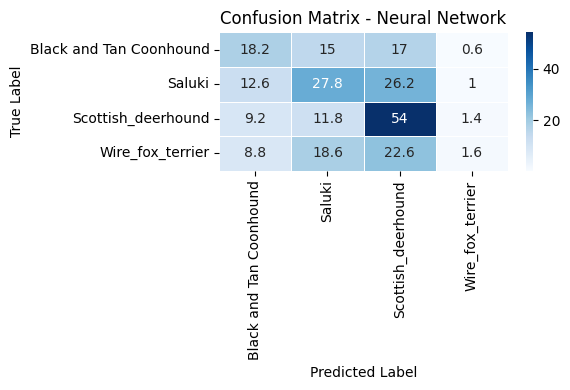

Training and evaluating Decision Tree classifier...


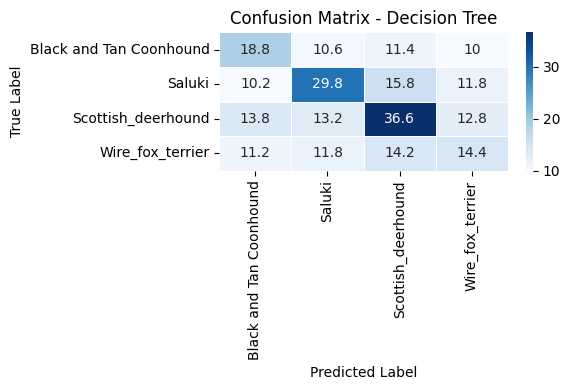

Training and evaluating AdaBoost classifier...


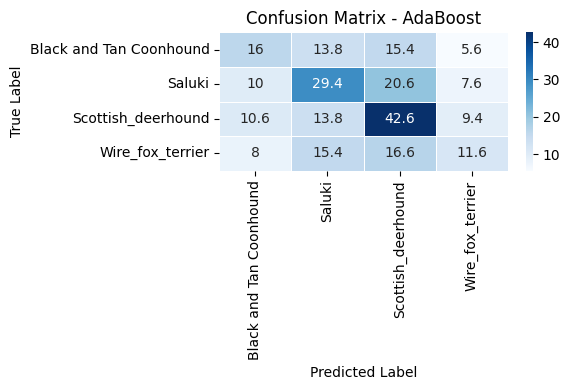

Confusion matrices computed.


In [73]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the confusion matrices list
conf_matrices = []

# Initialize empty lists to store predictions for each classifier
neural_network_predictions = []
decision_tree_predictions = []
adaboost_predictions = []

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifiers = {
    "Neural Network": mlp_classifier,
    "Decision Tree": decision_tree_classifier,
    "AdaBoost": adaboost_classifier
}

for name, clf in classifiers.items():
    print(f"Training and evaluating {name} classifier...")

    # Initialize the total confusion matrix
    total_conf_matrix = np.zeros((4, 4))

    for train_index, val_index in skf.split(x_train, y_train):
        X_train, X_val = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Fit the classifier on the training fold
        clf.fit(X_train, y_train_fold)

        # Predict on the validation fold
        y_pred = clf.predict(X_val)

        # Store predictions for each fold
        if name == "Neural Network":
            neural_network_predictions.extend(y_pred)
        elif name == "Decision Tree":
            decision_tree_predictions.extend(y_pred)
        elif name == "AdaBoost":
            adaboost_predictions.extend(y_pred)

        # Compute confusion matrix for this fold
        conf_matrix_fold = confusion_matrix(y_val_fold, y_pred)

        # Add to total confusion matrix
        total_conf_matrix += conf_matrix_fold

    # Calculate average confusion matrix over folds
    avg_conf_matrix = total_conf_matrix / 5

    # Add to list of confusion matrices
    conf_matrices.append((name, avg_conf_matrix))

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_conf_matrix, annot=True, fmt="g", cmap='Blues', linewidths=0.5,
                xticklabels=["Black and Tan Coonhound", "Saluki", "Scottish_deerhound", "Wire_fox_terrier"],
                yticklabels=["Black and Tan Coonhound", "Saluki", "Scottish_deerhound", "Wire_fox_terrier"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

print("Confusion matrices computed.")


In [ ]:
# Assuming you have standardized_edge_histograms, labels, and other relevant variables

# Get unique class labels
unique_classes = set(labels)

# Initialize empty lists to store training and test sets
x_train, x_test, y_train, y_test = [], [], [], []

# Perform 80/20 split for each class
for class_label in unique_classes:
    class_indices = [i for i, label in enumerate(labels) if label == class_label]
    class_histograms = [standardized_edge_histograms[i] for i in class_indices]
    class_labels = [labels[i] for i in class_indices]

    # Perform the split
    class_x_train, class_x_test, class_y_train, class_y_test = train_test_split(
        class_histograms, class_labels, test_size=0.2, random_state=42
    )

    # Append to the overall training and test sets
    x_train.extend(class_x_train)
    x_test.extend(class_x_test)
    y_train.extend(class_y_train)
    y_test.extend(class_y_test)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (1232, 36)
Test set shape: (310, 36)


In [ ]:
# Get unique class labels
unique_classes = set(labels)

# Initialize empty lists to store training and test sets
x_train, x_test, y_train, y_test = [], [], [], []

# Perform 80/20 split for each class
for class_label in unique_classes:
    class_indices = [i for i, label in enumerate(labels) if label == class_label]
    class_histograms = [standardized_edge_histograms[i] for i in class_indices]
    class_labels = [labels[i] for i in class_indices]

    # Perform the split
    class_x_train, class_x_test, class_y_train, class_y_test = train_test_split(
        class_histograms, class_labels, test_size=0.2, random_state=42
    )

    # Append to the overall training and test sets
    x_train.extend(class_x_train)
    x_test.extend(class_x_test)
    y_train.extend(class_y_train)
    y_test.extend(class_y_test)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
# Get unique class labels
unique_classes = set(labels)

# Initialize empty lists to store training and test sets
x_train, x_test, y_train, y_test = [], [], [], []

# Perform 80/20 split for each class
for class_label in unique_classes:
    class_indices = [i for i, label in enumerate(labels) if label == class_label]
    class_histograms = [standardized_edge_histograms[i] for i in class_indices]
    class_labels = [labels[i] for i in class_indices]

    # Perform the split
    class_x_train, class_x_test, class_y_train, class_y_test = train_test_split(
        class_histograms, class_labels, test_size=0.2, random_state=42
    )

    # Append to the overall training and test sets
    x_train.extend(class_x_train)
    x_test.extend(class_x_test)
    y_train.extend(class_y_train)
    y_test.extend(class_y_test)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
# Assign YOUR_X_TRAIN_DATA and YOUR_Y_TRAIN_DATA
YOUR_X_TRAIN_DATA = x_train
YOUR_Y_TRAIN_DATA = y_train


In [ ]:
# Calculate mean accuracies and mean F1 scores for each classifier
for name, classifier in classifiers.items():
    # Initialize empty lists to store predictions for each fold
    predictions = []

    # Initialize the total confusion matrix
    total_conf_matrix = np.zeros((4, 4))

    for train_index, val_index in skf.split(x_train, y_train):
        X_train, X_val = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Fit the classifier on the training fold
        classifier.fit(X_train, y_train_fold)

        # Predict on the validation fold
        y_pred = classifier.predict(X_val)

        # Store predictions for each fold
        predictions.extend(y_pred)

        # Print the number of predictions for each fold (for debugging)
        print(f"Classifier: {name}, Fold: {len(predictions)}, Predictions: {predictions}")

        # Compute confusion matrix for this fold
        conf_matrix_fold = confusion_matrix(y_val_fold, y_pred)

        # Add to total confusion matrix
        total_conf_matrix += conf_matrix_fold

    # Calculate average confusion matrix over folds
    avg_conf_matrix = total_conf_matrix / 5

    # Calculate accuracy
    acc = np.trace(avg_conf_matrix) / np.sum(avg_conf_matrix)
    accuracies[name] = acc

    # Calculate F1 score only if there are predictions
    if len(predictions) > 0:
        # Flatten the true labels to match the predictions
        y_true = np.concatenate([y_val_fold for _, y_val_fold in skf.split(x_train, y_train)])

        # Convert true labels to string format
        y_true = y_true.astype(str)

        # Convert predictions to string format
        predictions = np.array(predictions).astype(str)

        # Check if y_true and predictions have the same length
        if len(y_true) != len(predictions):
            raise ValueError("Length of y_true and predictions do not match.")

        f1 = f1_score(y_true, predictions, average='macro')
        f1_scores[name] = f1

# Calculate mean accuracies and mean F1 scores over available folds
mean_accuracy_neural_network = np.mean(list(accuracies.values())[0:5])
mean_accuracy_decision_tree = np.mean(list(accuracies.values())[5:10])
mean_accuracy_adaboost = np.mean(list(accuracies.values())[10:15])

mean_f1_neural_network = np.mean(list(f1_scores.values())[0:5])
mean_f1_decision_tree = np.mean(list(f1_scores.values())[5:10])
mean_f1_adaboost = np.mean(list(f1_scores.values())[10:15])

# Print the mean accuracies and mean F1 scores for each classifier
print("Mean Accuracies:")
print("Neural Network:", mean_accuracy_neural_network)
print("Decision Tree:", mean_accuracy_decision_tree)
print("AdaBoost:", mean_accuracy_adaboost)

print("\nMean F1 Scores:")
print("Neural Network:", mean_f1_neural_network)
print("Decision Tree:", mean_f1_decision_tree)
print("AdaBoost:", mean_f1_adaboost)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Neural Network, Fold: 247, Predictions: ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02095314

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Neural Network, Fold: 494, Predictions: ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02095314

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Neural Network, Fold: 740, Predictions: ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02095314

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Neural Network, Fold: 986, Predictions: ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02095314

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: Neural Network, Fold: 1232, Predictions: ['n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02092002-Scottish_deerhound', 'n02091831-Saluki', 'n02089078-black-and-tan_coonhound', 'n02091831-Saluki', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02089078-black-and-tan_coonhound', 'n02092002-Scottish_deerhound', 'n0209531

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [67]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

accuracy_scores = []
f1_scores = []

# Initialize classifiers
neural_network_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=1)
decision_tree_classifier = DecisionTreeClassifier(random_state=1)
adaboost_classifier = AdaBoostClassifier(random_state=1)

classifiers = [neural_network_classifier, decision_tree_classifier, adaboost_classifier]
classifier_names = ['Neural Network', 'Decision Tree', 'AdaBoost']

for classifier, classifier_name in zip(classifiers, classifier_names):

    classifier.fit(x_train, y_train)

    Y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, Y_pred)
    f1 = f1_score(y_test, Y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print accuracy and F1 score for each classifier
for classifier_name, accuracy, f1 in zip(classifier_names, accuracy_scores, f1_scores):
    print(f'{classifier_name} - Accuracy: {accuracy}, F1 Score: {f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - Accuracy: 0.4129032258064516, F1 Score: 0.36143738579254925
Decision Tree - Accuracy: 0.36129032258064514, F1 Score: 0.3635552141304534
AdaBoost - Accuracy: 0.34838709677419355, F1 Score: 0.33262276777806316


In [66]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

accuracy_scores = []
f1_scores = []

# Initialize classifiers
neural_network_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=1)
decision_tree_classifier = DecisionTreeClassifier(random_state=1)
adaboost_classifier = AdaBoostClassifier(random_state=1)

classifiers = [neural_network_classifier, decision_tree_classifier, adaboost_classifier]
classifier_names = ['Neural Network', 'Decision Tree', 'AdaBoost']

for classifier, classifier_name in zip(classifiers, classifier_names):

    classifier.fit(x_train, y_train)

    Y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, Y_pred)
    f1 = f1_score(y_test, Y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

best_method_index_accuracy = np.argmax(accuracy_scores)
best_method_index_f1_score = np.argmax(f1_scores)
best_method_name = classifier_names[best_method_index_accuracy]
best_method_name_f1 = classifier_names[best_method_index_f1_score]

print(f'The best method based on accuracy is: {best_method_name}')
print(f'The best method based on F1 score is: {best_method_name_f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The best method based on accuracy is: Neural Network
The best method based on F1 score is: Decision Tree
